In [17]:
###########  LOADING AND MAKING THE DATA GOOD


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation

# The dude that did this: https://www.youtube.com/watch?v=j6jstahQp2A


url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
c=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
d=pd.read_csv(url, compression='zip')

c = c[['Accident_Index', 'Accident_Severity' ,'Date','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
d = d[['Accident_Index','Vehicle_Reference','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']]

# c.groupby('Road_Surface_Conditions').count() /////// Important stuff
print(c.shape)
print(d.shape)

l = [c,d]
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index
joined = pd.merge(c, d, on='Accident_Index')

joined.shape

df_join = joined

df_join.Accident_Severity = df_join.Accident_Severity.replace(2,1)
df_join.Accident_Severity = df_join.Accident_Severity.replace(3,0)

df_join.dropna()

print(df_join.shape)
df_join.head(5)


#Define input array with angles from 60deg to 300deg converted to radians
df = df_join.drop(['Accident_Index','Date','Time'],1)          #,'Vehicle_Type'], 1) #,'1st_Road_Class','Road_Surface_Conditions','Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle', 'Age_of_Driver'], axis=1)
df = df.dropna()
# print(df.head(5))

C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(136621, 10)
(252500, 6)
(252500, 15)


In [18]:
#     UNSUPERVISED LEARNING - NOT SCALED
#---------------####------------------#

#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation


# X = df.drop(['Accident_Severity'], axis=1)
# y = df.Accident_Severity
# # print(X)
# print(df.shape)
# print(X.shape)


array = df.values
X = array[:,1:]
y = array[:,0]


#------------------------------


clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))


# print(joined)'Speed_limit','Light_Conditions','Weather_Conditions',

0.46293501297363676


In [19]:
#     UNSUPERVISED LEARNING - SCALED
#---------------####------------------#

#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation


array = df.values
X = array[:,1:]
X = preprocessing.scale(X)
y = array[:,0]



#------------------------------


clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))


# print(joined)'Speed_limit','Light_Conditions','Weather_Conditions',

0.6820963812466575


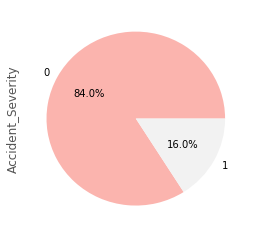

In [22]:
plt.figure(figsize=(4,4))
df['Accident_Severity'].value_counts().plot.pie(autopct= '%1.1f%%', cmap='Pastel1')

In [17]:
print(df.shape)

(252435, 13)


In [21]:
#      SUPERVISED REGRESSION
#--------------####-------------#
import math


forecast_col = 'Accident_Severity'

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.dropna(inplace=True)
print(df.tail(10))

        Accident_Severity  Day_of_Week  1st_Road_Class  Speed_limit  \
224973                  0            2               4         30.0   
224974                  1            2               3         60.0   
224975                  1            2               3         60.0   
224976                  0            1               4         30.0   
224977                  0            1               4         30.0   
224978                  0            3               3         40.0   
224979                  0            3               3         40.0   
224980                  0            3               3         60.0   
224981                  0            3               3         60.0   
224982                  0            1               1         70.0   

        Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
224973                 1                   1                        1   
224974                 1                   1                        1   

C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LR: 0.877800 (0.028572)
LDA: 0.877800 (0.028572)
KNN: 0.868000 (0.029093)
CART: 0.773600 (0.014827)
NB: 0.871600 (0.029513)
SVM: 0.877000 (0.028358)


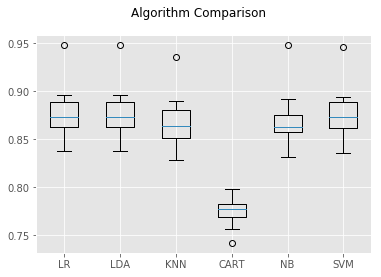

In [22]:
######## Compare Algorithms
####################################

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# load dataset


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
c=pd.read_csv(url, compression='zip')
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
d=pd.read_csv(url, compression='zip')
c = c[['Accident_Index', 'Accident_Severity' ,'Date','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
d = d[['Accident_Index','Vehicle_Reference','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']]
# l = [c,d]
joined = pd.merge(c, d, on='Accident_Index')
df_join = joined
df_join.Accident_Severity = df_join.Accident_Severity.replace(2,1)
df_join.Accident_Severity = df_join.Accident_Severity.replace(3,0)
df_join.dropna()
df_join.head(5)
df = df_join.drop(['Accident_Index','Date','Time'],1)          #,'Vehicle_Type'], 1) #,'1st_Road_Class','Road_Surface_Conditions','Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle', 'Age_of_Driver'], axis=1)
df = df.dropna()
df_L = df




array = df.values
X = array[:5000,1:]
# X = preprocessing.scale(X)
y = array[:5000,0]
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [38]:
#############  LINEAR REG. - DON'T

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


array = df.values
X = array[:,1:]
X = preprocessing.scale(X)
y = array[:,0]

# we split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #, random_state=0)

clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)
print(X)

0.014084579044897239
[[-0.5830745  -0.72357893 -0.59537709 ... -0.67724284  0.7666841
  -1.11413292]
 [-0.5830745  -0.72357893 -0.59537709 ... -0.67724284 -0.61647116
  -0.27906764]
 [-0.5830745  -0.72357893 -0.59537709 ...  0.9206616   0.02570807
  -0.78010681]
 ...
 [ 0.46593724 -1.40487175  2.18658324 ... -0.67724284  1.26066812
  -1.11413292]
 [ 1.51494898 -0.04228612  0.10011299 ... -0.67724284 -0.91286157
   1.22404985]
 [-1.63208624 -1.40487175  2.18658324 ... -0.67724284  0.61848889
  -0.11205459]]


In [42]:
##############   SUPPORT VECTOR 

from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


array = df.values
X = array[:2000,1:]
X = preprocessing.scale(X)
y = array[:2000,0]

# we split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #, random_state=0)

clf = svm.SVC()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)
print(X)

0.8775
[[-0.61169849 -0.63469409 -0.0578715  ... -0.61624009  0.92201666
  -0.96272085]
 [-0.61169849 -0.63469409 -0.0578715  ... -0.61624009 -0.5761534
  -0.09266134]
 [-0.61169849 -0.63469409 -0.0578715  ...  0.84577673  0.11942556
  -0.61469705]
 ...
 [-0.08323327 -0.63469409  1.25738979 ... -0.61624009  0.54747415
   0.95141008]
 [-0.08323327 -0.63469409  1.25738979 ...  0.84577673 -0.25511696
   2.1694934 ]
 [-0.08323327 -0.63469409  1.25738979 ... -0.61624009 -0.36212911
   0.95141008]]


In [37]:
#############   LINEAR DISCRIM. 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


array = df.values
X = array[:2000,1:]
X = preprocessing.scale(X)
y = array[:2000,0]

# we split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #, random_state=0)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)
print(X)

0.8825
[[-0.61169849 -0.63469409 -0.0578715  ... -0.61624009  0.92201666
  -0.96272085]
 [-0.61169849 -0.63469409 -0.0578715  ... -0.61624009 -0.5761534
  -0.09266134]
 [-0.61169849 -0.63469409 -0.0578715  ...  0.84577673  0.11942556
  -0.61469705]
 ...
 [-0.08323327 -0.63469409  1.25738979 ... -0.61624009  0.54747415
   0.95141008]
 [-0.08323327 -0.63469409  1.25738979 ...  0.84577673 -0.25511696
   2.1694934 ]
 [-0.08323327 -0.63469409  1.25738979 ... -0.61624009 -0.36212911
   0.95141008]]


In [23]:
############  LOGISTIC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


array = df.values
X = array[:,1:]
X = preprocessing.scale(X)
y = array[:,0]

# we split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #, random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)
print(X)

0.8376413730267197
[[-0.5830745  -0.72357893 -0.59537709 ... -0.67724284  0.7666841
  -1.11413292]
 [-0.5830745  -0.72357893 -0.59537709 ... -0.67724284 -0.61647116
  -0.27906764]
 [-0.5830745  -0.72357893 -0.59537709 ...  0.9206616   0.02570807
  -0.78010681]
 ...
 [ 0.46593724 -1.40487175  2.18658324 ... -0.67724284  1.26066812
  -1.11413292]
 [ 1.51494898 -0.04228612  0.10011299 ... -0.67724284 -0.91286157
   1.22404985]
 [-1.63208624 -1.40487175  2.18658324 ... -0.67724284  0.61848889
  -0.11205459]]


In [171]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [24]:
#     LOGISTIC REGRESSION
#------------####---------------#


X = df
# X = preprocessing.scale(X)
y = df['Accident_Severity']
print(type(y))
X.groupby(y).mean()

<class 'pandas.core.series.Series'>


,Day_of_Week,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Reference,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
Accident_Severity,,,,,,,,,,,
0,4.118964,4.060543,38.021061,1.910525,1.541043,1.278145,1.567291,9.802526,1.439471,34.960891,5.650838
1,4.073340,4.070072,41.393023,2.088469,1.469978,1.293857,1.528140,9.670265,1.341719,38.202887,5.776438


In [25]:
# Feature Extraction with PCA

#Feature extraction

model = LogisticRegression() 

rfe = RFE(model, 3)

fit = rfe.fit(X, y)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False False  True False False  True False False]
Feature Ranking: [ 1  4  2  6  5  7  1  3 10  1  8  9]


In [72]:
# Don't use - Only for dummy

# cat_vars=['Accident_Severity','Day_of_Week','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(df[var], prefix=var)
#     data1=df.join(cat_list)
#     data=data1
# cat_vars=['Day_of_Week','Speed_limit','Light_Conditions','Weather_Conditions','Road_surface_Conditions','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']
# data_vars=df.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]

In [30]:
# data_final=df
# data_final.columns.values

In [177]:
# data_final_vars=data_final.columns.values.tolist()
# y=['Accident_Severity']
# X=[i for i in data_final_vars if i not in y]

In [26]:
# X = scaled_df(['1'])
# y = scaled_df(['0'])

In [27]:
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
# rfe = RFE(logreg, 18)
# rfe = rfe.fit(data_final[X], data_final[y] )
# print(rfe.support_)
# print(rfe.ranking_)

In [28]:
# Xcols = ['Day_of_Week','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']
# ycols = ['Accident_Severity']

In [29]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary())